In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create a 3D dataset (100 points clustered around a line or plane)

In [2]:
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 0.5],
       [1, 2, 0.3],
       [0.5, 0.3, 1]]  # some correlation between axes
data_3d = np.random.multivariate_normal(mean, cov, 100)

# 2. Standardize the data (important for PCA)

In [3]:
data_mean = np.mean(data_3d, axis=0)
centered_data = data_3d - data_mean


# 3. Compute Covariance Matrix

In [4]:
cov_matrix = np.cov(centered_data.T)

# 4. Find Eigenvalues and Eigenvectors

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 5. Sort eigenvectors by descending eigenvalues (importance)

In [6]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# 6. Select the top 2 eigenvectors for 2D projection

In [7]:
top_2_eigenvectors = eigenvectors[:, :2]

In [8]:
# 7. Project the 3D data onto the 2D subspace
projected_data_2d = centered_data @ top_2_eigenvectors

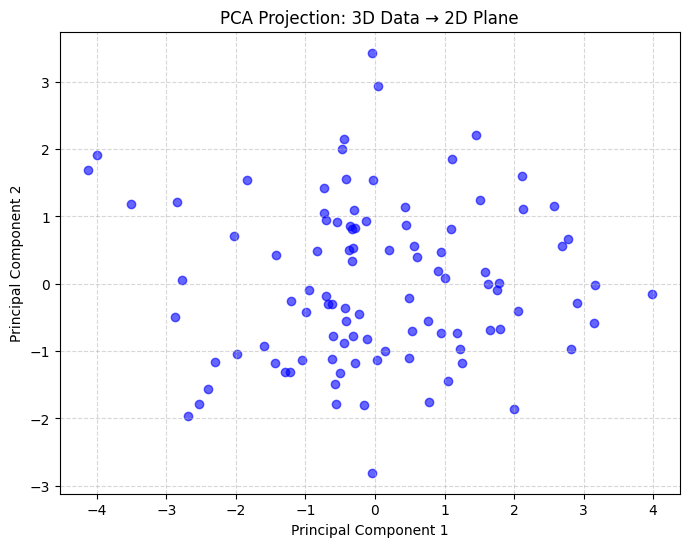

In [9]:
# 8. Visualize
plt.figure(figsize=(8,6))
plt.scatter(projected_data_2d[:, 0], projected_data_2d[:, 1], color='blue', alpha=0.6)
plt.title("PCA Projection: 3D Data → 2D Plane")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [10]:
# 9. (Optional) Print key results
print("Covariance Matrix:\n", cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nTop 2 Eigenvectors:\n", top_2_eigenvectors)

Covariance Matrix:
 [[2.20723229 0.42721501 0.34565165]
 [0.42721501 1.52212665 0.35860854]
 [0.34565165 0.35860854 1.22609454]]

Eigenvalues:
 [2.57653188 1.39570925 0.98321235]

Top 2 Eigenvectors:
 [[ 0.82974142  0.55501437]
 [ 0.44896637 -0.72655142]
 [ 0.33159973 -0.40507047]]
